과제 1

In [2]:
# 1. 데이터셋 불러오기
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# 2. 기초통계량 산출
iris.groupby("species")["petal_length"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [4]:
# 2. 그룹별 데이터 개수
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

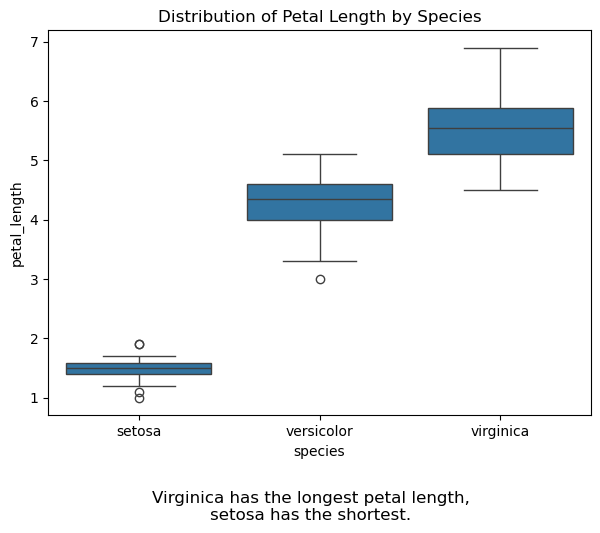

In [5]:
# 3. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Distribution of Petal Length by Species')
plt.figtext(0.5, -0.1, "Virginica has the longest petal length,\nsetosa has the shortest.", ha='center', fontsize=12)
plt.show()

In [6]:
#4. 정규성 검정
from scipy.stats import shapiro

# 가설 수립
print("귀무가설(H₀): 각 species의 Petal Length는 정규분포를 따른다.")
print("대립가설(H₁): 각 species의 Petal Length는 정규분포를 따르지 않는다.\n")

# Speices별 정규성 검정
for species in iris['species'].unique():
    petal = iris.loc[iris['species'] == species, 'petal_length']
    stat , p = shapiro(petal)
    print(f"{species}: p-value = {p:.4f}")
    if p > 0.05:
        print(f" 귀무가설(H₀) 채택,  p-value가 유의수준 0.05보다 크기 때문에 {species}의 Petal Length가 정규분포를 따른다고 볼 수 있다. ")
    else: 
        print(f"귀무가설(H₀) 기각, p-value가 유의수준 0.05보다 작기 때문에 {species}의 Petal Length가 정규분포를 따른다고 보기 어렵다.")
    print()

귀무가설(H₀): 각 species의 Petal Length는 정규분포를 따른다.
대립가설(H₁): 각 species의 Petal Length는 정규분포를 따르지 않는다.

setosa: p-value = 0.0548
 귀무가설(H₀) 채택,  p-value가 유의수준 0.05보다 크기 때문에 setosa의 Petal Length가 정규분포를 따른다고 볼 수 있다. 

versicolor: p-value = 0.1585
 귀무가설(H₀) 채택,  p-value가 유의수준 0.05보다 크기 때문에 versicolor의 Petal Length가 정규분포를 따른다고 볼 수 있다. 

virginica: p-value = 0.1098
 귀무가설(H₀) 채택,  p-value가 유의수준 0.05보다 크기 때문에 virginica의 Petal Length가 정규분포를 따른다고 볼 수 있다. 



In [7]:
# 5. 등분산성 검정
from scipy.stats import levene

#가설 수립
print("귀무가설(H₀): 세 species의 Petal Length 분산은 모두 같다(등분산이다).")
print("대립가설(H₁): 적어도 한 species의 Petal Length 분산이 다르다.\n")

setosa = iris.loc[iris['species'] == 'setosa', 'petal_length']
versicolor = iris.loc[iris['species'] == 'versicolor', 'petal_length']
virginica = iris.loc[iris['species'] == 'virginica', 'petal_length']

#등분산성 검정
stat, p = levene(setosa, versicolor, virginica)
print(f"Levene 등분산성 검정 p-value = {p}")

if p > 0.05:
    print("귀무가설(H₀) 채택, p-value가 유의수준 0.05보다 크기 때문에 등분산성을 만족한다고 볼 수 있다.")
else:
    print("귀무가설(H₀) 기각, p-value가 유의수준 0.05보다 작기 때문에 등분산성을 만족한다고 보기 어렵다.")

귀무가설(H₀): 세 species의 Petal Length 분산은 모두 같다(등분산이다).
대립가설(H₁): 적어도 한 species의 Petal Length 분산이 다르다.

Levene 등분산성 검정 p-value = 3.1287566394085344e-08
귀무가설(H₀) 기각, p-value가 유의수준 0.05보다 작기 때문에 등분산성을 만족한다고 보기 어렵다.


In [8]:
# 6. 가설 수립
print("귀무가설(H₀): 3개 species의 평균 petal_length는 모두 같다.")
print("대립가설(H₁): 적어도 한 species의 평균 petal_length는 다르다.")


귀무가설(H₀): 3개 species의 평균 petal_length는 모두 같다.
대립가설(H₁): 적어도 한 species의 평균 petal_length는 다르다.


In [9]:
# 7. ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('petal_length ~ C(species)', data=iris).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

p = anova_table['PR(>F)'].iloc[0]
print(f"\nANOVA p-value: {p:.4e}")

if p > 0.05:
    print("귀무가설(H₀) 채택: 3개 종의 평균에 유의미한 차이가 없다고 볼 수 있다.")
else:
    print("귀무가설(H₀) 기각: 3개 종의 평균이 통계적으로 유의미하게 다르다.")


              sum_sq     df            F        PR(>F)
C(species)  437.1028    2.0  1180.161182  2.856777e-91
Residual     27.2226  147.0          NaN           NaN

ANOVA p-value: 2.8568e-91
귀무가설(H₀) 기각: 3개 종의 평균이 통계적으로 유의미하게 다르다.


In [10]:
# 8. 사후검정 (Tukey HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(iris['petal_length'], iris['species'])
print(tukey_result)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


9. 결과 요약

Shapiro-Wilk 검정 결과, 세 집단(setosa, versicolor, virginica)의 Petal Length는 모두 정규성을 만족하였다(p > 0.05). 반면, Levene 검정을 통해 등분산성이 통계적으로 유의하게 성립하지 않음이 확인되었다.(p < 0.05).

이러한 조건 하에 수행된 ANOVA 결과, 세 집단 간 평균 Petal Length에 유의한 차이가 있는 것으로 나타났다. 이에 따라 귀무가설이 기각되었다.
사후검정으로 수행한 Tukey의 HSD 결과, 각 집단 간 쌍 비교 모두에서 통계적으로 유의한 차이가 존재하였다으며, 세 집단의 평균 Petal Length는 virginica > versicolor > setosa 순으로, virginica가 가장 길고 setosa가 가장 짧았다.

이와 같은 결과는 시각화된 Boxplot 및 Tukey HSD 결과와 일관된 양상을 보이며, 세 품종 간의 명확한 형태적 차이를 통계적으로도 뒷받침한다.

과제 2

In [17]:
# 1. 데이터 로드 및 기본 탐색
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, average_precision_score

df = pd.read_csv('/Users/namkuhyuk-uimacbook/Desktop/YBIGTA/creditcard.csv')
print(df.head())
print(df['Class'].value_counts())  # 0: 정상, 1: 사기



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [12]:
# 2. 샘플링

fraud = df[df['Class'] == 1]

normal = df[df['Class'] == 0].sample(n=10000, random_state=42)

df_sampled = pd.concat([fraud, normal], ignore_index=True)


print(df_sampled['Class'].value_counts())
print(df_sampled['Class'].value_counts(normalize=True) * 100)


Class
0    10000
1      492
Name: count, dtype: int64
Class
0    95.310713
1     4.689287
Name: proportion, dtype: float64


In [13]:
# 3. 데이터 전처리 
scaler = StandardScaler()
df_sampled['Amount_Scaled'] = scaler.fit_transform(df_sampled[['Amount']])
df_sampled = df_sampled.drop('Amount', axis=1)

# X, y 분리
X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']


In [14]:
# 4. 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train set class distribution:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True) * 100)

print("\nTest set class distribution:")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True) * 100)

Train set class distribution:
Class
0    7999
1     394
Name: count, dtype: int64
Class
0    95.305612
1     4.694388
Name: proportion, dtype: float64

Test set class distribution:
Class
0    2001
1      98
Name: count, dtype: int64
Class
0    95.33111
1     4.66889
Name: proportion, dtype: float64


In [15]:
# 5. SMOTE 적용

print("Before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


X_train_resampled, y_train_resampled = shuffle(
    X_train_resampled, y_train_resampled, random_state=42
)

print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())


Before SMOTE:
Class
0    7999
1     394
Name: count, dtype: int64

After SMOTE:
Class
1    7999
0    7999
Name: count, dtype: int64


SMOTE 적용의 이유

SMOTE를 적용하는 이유는, 현재 학습데이터에서 사기거래의 수가 현저히 적기 때문입니다. 이처럼 클래스 간 불균형이 심한 데이터를 그대로 학습에 적용하면, 모델은 대부분의 경우를 정상거래오 예측하게 되기 때문에, 실제로 중요한 사기 거래를 제대로 탐지하지 못하는 문제가 발생합니다. SMOTE를 활용하여 기존의 사기 거래 데이터와 유사한 새로운 가상의 데이터를 생성함으로써 이러한 문제점을 해결할 수 있습니다.

In [16]:
# 6. 모델 학습

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

pr_auc = average_precision_score(y_test, y_proba)
print("\n=== PR-AUC (Precision-Recall AUC) ===")
print(pr_auc)


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2001
           1       0.81      0.93      0.86        98

    accuracy                           0.99      2099
   macro avg       0.90      0.96      0.93      2099
weighted avg       0.99      0.99      0.99      2099


=== PR-AUC (Precision-Recall AUC) ===
0.9534699504261935


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7. 최종 성능 평가

데이터 셋이 범주형 자료이며 SMOTE를 활용하여 범주간의 데이터 개수의 차이를 맞추어 주었기에 가장 기본이 되는 로지스틱 회귀를 모델로 선정하였습니다.
테스트셋 기준으로 Recall(0.93), PR-AUC(0.95)는 달성하였지만 F1-score(0.86)으로 달성하지 못하였습니다. 하지만 전체적으로 모델은 사기 거래를 잘 탐지하고 있으며 우수한 성능을 보였습니다. 목표한 F1-score를 높이기 위해서는 예측 확률을 threshold 조정해주는 방법이 있습니다.